In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exponential similarity

In [2]:
np.random.seed(seed=10)
#r = np.abs(np.random.randn(1000))
#t = np.random.randn(1000)
#x = r *np.cos(2*np.pi*t)
#y = r* np.sin(2*np.pi*t)
x = np.random.randn(1000)
y = np.random.randn(1000)
r = np.sqrt(x**2 + y**2)
## Distribution centered on zero
def simil(sigma):
    p = np.exp(-(x**2 + y**2)/(4*sigma**2))
    p = p/p.sum()
    return p

In [3]:

for sigma in [0.1,0.2,0.5,1.0,2.0]:
    fig, ax = plt.subplots(1, figsize=(10,5))
    scatt = ax.scatter(x,y, c=simil(sigma), marker='.', cmap='viridis_r')
    #circle = plt.Circle((0, 0), 2*sigma, color='r', fill=False, label='Circle of radius 2sigma')
    #ax.add_artist(circle)
    cbar = plt.colorbar(scatt)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Similarity to (0,0)', rotation=270)
    plt.axis('off')
    fig.suptitle(f'Similarity to (0,0) for sigma={sigma}')
    plt.savefig(f'../slides/pic/similarity_{sigma}.pdf', transparent=True)
    plt.close()

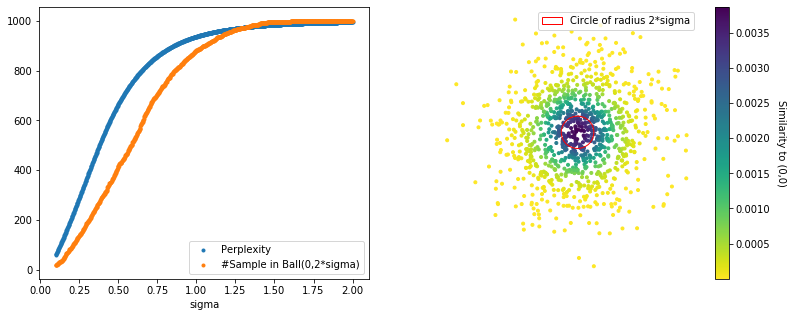

In [4]:
def perp(s):
    p = simil(s)
    return 2**np.sum(-p*np.log2(p))

def count_incircle(s):
    return (r<2*s).sum()
sigmas = np.linspace(0.1,2,1000)
sigma_perp = np.array(list(map(perp, sigmas)))
sigma_count = np.array(list(map(count_incircle, sigmas)))
###
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].scatter(sigmas, sigma_perp, label='Perplexity', marker='.')
ax[0].scatter(sigmas, sigma_count, label = '#Sample in Ball(0,2*sigma)', marker='.')
ax[0].set_xlabel('sigma')
ax[0].legend()
#    
scatt = ax[1].scatter(x,y, c=simil(0.4), marker='.', cmap='viridis_r')
circle = plt.Circle((0, 0), 2*0.2, color='r', fill=False, label='Circle of radius 2*sigma')
ax[1].add_artist(circle)
ax[1].legend(handles=[circle])
ax[1].axis('off')
cbar = plt.colorbar(scatt)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Similarity to (0,0)', rotation=270)
plt.savefig('../slides/pic/perplexity.pdf', transaparent=True)

In [5]:
list(map(simil, sigma))


TypeError: 'float' object is not iterable

In [ ]:
np.arctan(2/200)*180/np.pi